In [209]:
# Import Neccessary Packages
import json
import pandas as pd
import numpy as np
from scipy.sparse import lil_matrix
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt


In [210]:
player_totals = pd.read_csv("Player Totals.csv")
player_totals = player_totals[player_totals['season'] == 2024]
player_totals = player_totals[['pts']]
player_totals.head()


,pts
0,252
1,136
2,48
3,1013
4,514


In [211]:
player_data = pd.read_csv("Player Per Game.csv")
player_data = player_data[player_data['season'] == 2024]
player_data = player_data[['player', 'pos', 'pts_per_game', 'trb_per_game', 'ast_per_game']]
player_data.insert(5, 'total points', player_totals)
player_data.head()


,player,pos,pts_per_game,trb_per_game,ast_per_game,total points
0,A.J. Green,SG,3.3,0.8,0.6,252
1,A.J. Lawson,SG,4.2,1.3,0.6,136
2,AJ Griffin,SF,2.1,0.8,0.2,48
3,Aaron Gordon,PF,13.6,6.7,3.1,1013
4,Aaron Holiday,PG,6.5,1.9,1.7,514


In [212]:
player_data.fillna(0, inplace=True)


In [213]:
# Position IDs 
position_dict = {
    "PG": 1,
    "SG": 2,
    "SF": 3,
    "PF": 4,
    "C": 5,
}

player_data['pos_id'] = player_data['pos'].map(position_dict)
player_data.head()


,player,pos,pts_per_game,trb_per_game,ast_per_game,total points,pos_id
0,A.J. Green,SG,3.3,0.8,0.6,252,2.0
1,A.J. Lawson,SG,4.2,1.3,0.6,136,2.0
2,AJ Griffin,SF,2.1,0.8,0.2,48,3.0
3,Aaron Gordon,PF,13.6,6.7,3.1,1013,4.0
4,Aaron Holiday,PG,6.5,1.9,1.7,514,1.0


In [214]:
player_data = player_data.drop('player', axis=1)
player_data = player_data.drop('pos', axis=1)


In [215]:
player_data = pd.read_csv('ppg.csv')


In [216]:
# Features and Target 
feat = ['pts_per_game', 'trb_per_game', 'ast_per_game', 'pos_id']
target = 'total points'

In [217]:
X = player_data[feat]
y = player_data[target]


In [224]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [220]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [221]:
# Make predictions on the test set
y_pred = model.predict(X_test)


Mean Squared Error: 204121.77291492317
Mean Absolute Error: 339.83972994986584


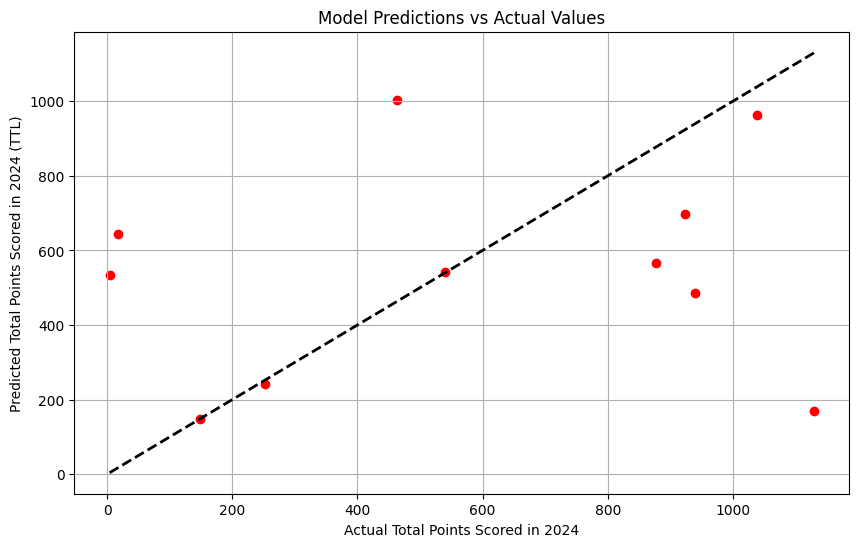

In [223]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

#Prints the mean squared error and mean absolute error
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2)  # Plotting the diagonal line
plt.title('Model Predictions vs Actual Values')
plt.xlabel('Actual Total Points Scored in 2024')
plt.ylabel('Predicted Total Points Scored in 2024 (TTL)')
plt.grid(True)
plt.show()